Необходимо выполнить:

Решить дифференциальное уравнение (2) и построить график функции 

Решить дифференциальное уравнение (3) и построить график функции 

Используя решения уравнений (2) и (3), с помощью уравнения (1), найти решение уравнения (4) (используйте интерполяцию interp1d) и построить график функции 

Построить все три графика 

In [50]:
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d


In [51]:
A = 0.5
B = 0.3 
N = 1000000 
S = 990000 
I = 7000
R = 3000 
t0 = 0
tf = 25

In [52]:
def dsdt(t, y):
    return -A * y

In [53]:
result_dsdt = dsdt([t0, tf], S)

result = solve_ivp(dsdt, [t0, tf], [S], dense_output=True)

result

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 98
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7f8d15a3c5e0>
   status: 0
  success: True
        t: array([ 0.        ,  0.11486984,  1.26356819,  3.06043758,  4.8157449 ,
        6.57363058,  8.33135596, 10.08909132, 11.84682607, 13.60456089,
       15.36229578, 17.12003086, 18.87776637, 20.63550293, 22.39324202,
       24.15098721, 25.        ])
 t_events: None
        y: array([[9.90000000e+05, 9.34741505e+05, 5.26338915e+05, 2.14449863e+05,
        8.92016780e+04, 3.70563463e+04, 1.53952532e+04, 6.39600686e+03,
        2.65724217e+03, 1.10395999e+03, 4.58643792e+02, 1.90545047e+02,
        7.91625391e+01, 3.28883086e+01, 1.36635268e+01, 5.67652784e+00,
        3.71298656e+00]])
 y_events: None

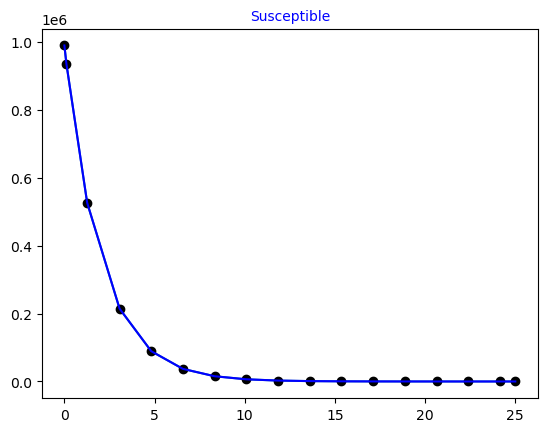

In [71]:
t_dsdt, y_dsdt = result.t, result.y[0]

plt.plot(t_dsdt, y_dsdt)
z_dsdt, = result.sol(t_dsdt)
plt.plot(t_dsdt, y_dsdt, 'o', color='k', label='solve_ivp')

plt.plot(t_dsdt, z_dsdt, color='blue', label='Interpolation')
plt.title('Susceptible', fontsize=10, color='blue')


plt.show()

In [55]:
def di_dt(t, i):
    return (A*result.sol(t) - B*i)

In [56]:
result_didt = di_dt([t0, tf], I)
result1 = solve_ivp(di_dt, [t0, tf], [I], dense_output=True)
result1

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 80
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7f8d1567c190>
   status: 0
  success: True
        t: array([0.00000000e+00, 1.42016636e-02, 1.56218300e-01, 1.46534293e+00,
       3.30463452e+00, 5.49012015e+00, 8.32920731e+00, 1.14496758e+01,
       1.45701443e+01, 1.76449222e+01, 2.06395417e+01, 2.36032033e+01,
       2.50000000e+01])
 t_events: None
        y: array([[  7000.        ,  13960.24492701,  79326.36974353,
        409578.08334945, 446699.01195032, 319077.83026358,
        165571.99129925,  71966.74863389,  29712.58392708,
         12130.57394067,   5009.75291427,   2075.26330119,
          1367.85128541]])
 y_events: None

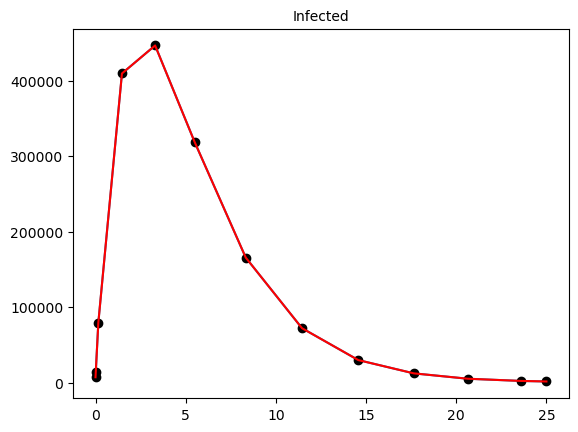

In [69]:
t_didt, y_didt = result1.t, result1.y[0]

plt.plot(t_didt, y_didt)
z_didt, = result1.sol(t_didt)
plt.plot(t_didt, y_didt, 'o', color='k', label='solve_ivp')
plt.plot(t_didt, z_didt, color='red')
plt.title('Infected', fontsize=10)
plt.show()

In [63]:
R = N - result.sol(result1.t)[0] - result1.y[0]
interp_r = interp1d(result1.t, R, kind='linear')

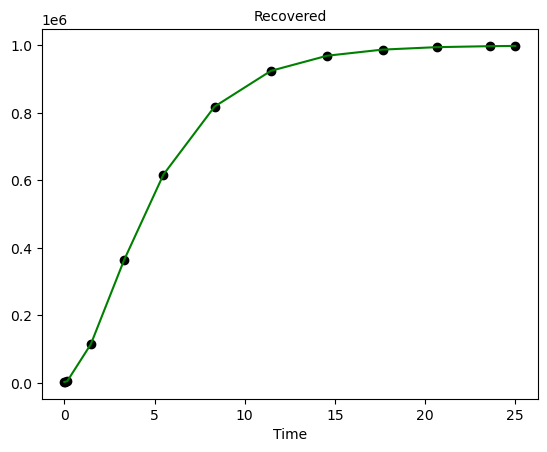

In [70]:
plt.plot(result1.t, R, 'o', color='k', label='solve_ivp')
plt.plot(result1.t, interp_r(result1.t), color='green', label='Recovered')

plt.title('Recovered', fontsize=10)
plt.xlabel('Time', fontsize=10) 

plt.show()

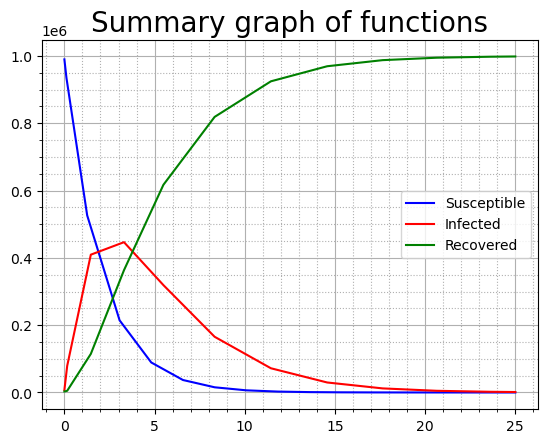

In [75]:

plt.plot(t_dsdt, y_dsdt, color='blue', label='Susceptible')
plt.plot(t_didt, y_didt, color='red', label='Infected')
plt.plot(result1.t, R, color='green', label='Recovered')

plt.title('Summary graph of functions', fontsize=20, color='k')
plt.legend()
plt.grid(which='major')
plt.minorticks_on()
plt.grid(which='minor', linestyle=':');
plt.show()